In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/dafahan/Downloads/makanan'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5536.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5537.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5540.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5541.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5538.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5533.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5542.JPG
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5535.JPG
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 3.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 7.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 5.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 6.jpg
/home/dafahan/Downloads/makanan/train/Salmon Panggang/Salmon Panggang 1.jpg
/home/dafahan/Downloads/maka

In [187]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.16.1


In [188]:
# Create a list with the filepaths for training and testing
train_dir = Path('../../../Downloads/makanan/train/')
train_jpg = list(train_dir.glob(r'**/*.jpg'))
train_JPG = list(train_dir.glob(r'**/*.JPG'))
train_jpeg = list(train_dir.glob(r'**/*.jpeg'))
train_filepaths = train_jpg+train_jpeg+train_JPG

In [189]:
test_dir = Path('../../../Downloads/makanan/test/')
test_jpg = list(test_dir.glob(r'**/*.jpg'))
test_JPG = list(test_dir.glob(r'**/*.JPG'))
test_jpeg = list(test_dir.glob(r'**/*.jpeg'))
test_filepaths = test_jpg + test_jpeg + test_JPG

In [190]:
val_dir = Path('../../../Downloads/makanan/validation/')
val_jpg = list(test_dir.glob(r'**/*.jpg'))
val_JPG = list(test_dir.glob(r'**/*.JPG'))
val_jpeg = list(test_dir.glob(r'**/*.jpeg'))
val_filepaths = val_jpg + val_jpeg+val_JPG

In [191]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [192]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [193]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 696

Number of different labels: 87

Labels: ['Udang Goreng' 'Risol Bihun' 'Es Loli' 'Tumis Tahu' 'Roti Isi Coklat'
 'Spaghetti' 'Udang Lapis Tepung' 'Martabak Keju' 'Nagasari' 'Gado-gado'
 'Nasi Uduk' 'Lasagna' 'Chicken Katsu' 'Nasi Hainan' 'Salad Buah'
 'Donat (Glazed)' 'Ayam Geprek' 'Sate Ayam' 'Lumpia Basah' 'Rendang'
 'Brownies' 'Mie Ayam' 'Cumi Goreng' 'Klepon' 'Pizza Keju' 'Nasi Padang'
 'Risol Mayo' 'Nasi Merah' 'Nasi Goreng Ayam' 'Kue Cubit' 'Tahu Isi'
 'Nasi Goreng' 'Tempe Orek' 'Bakpia' 'Mie Goreng' 'Tuna Salad Sandwich'
 'Sandwich Keju' 'Ramen Ayam' 'Telur Dadar Sayur' 'Telur Goreng'
 'Makaroni Keju' 'Kari Ayam' 'Gelato' 'Es Krim Coklat' 'Keripik Kentang'
 'Soto Mie' 'Oatmeal Ubi Jalar' 'Lapis Legit (1 potong)' 'Sup Sayur Ayam'
 'Mochi' 'Es Krim Strawberry' 'Kentang Goreng' 'Salmon Panggang'
 'Kerupuk Udang' 'Burger' 'Bubur Ayam' 'Empal Gentong ' 'Dimsum'
 'Puding Coklat' 'Kue Lumpur' 'Soto Ayam' 'Serabi' 'Nugget Ayam'
 'Ikan Gurame A

In [194]:
train_df.head(5)


,Filepath,Label
0,../../../Downloads/makanan/train/Udang Goreng/...,Udang Goreng
1,../../../Downloads/makanan/train/Risol Bihun/r...,Risol Bihun
2,../../../Downloads/makanan/train/Risol Bihun/r...,Risol Bihun
3,../../../Downloads/makanan/train/Es Loli/Es Lo...,Es Loli
4,../../../Downloads/makanan/train/Tumis Tahu/Tu...,Tumis Tahu


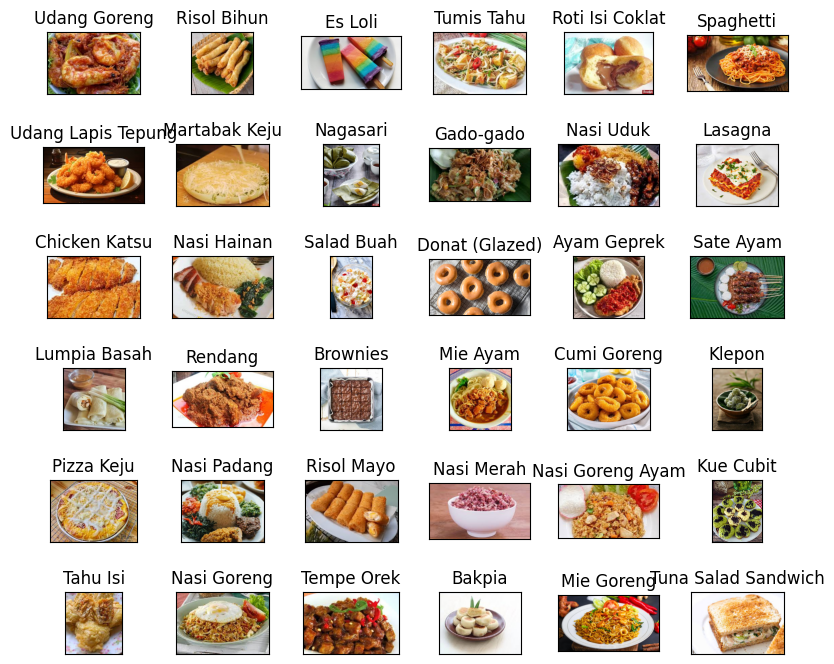

In [195]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=2)
plt.show()

In [196]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [197]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 696 validated image filenames belonging to 87 classes.


In [198]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 86 validated image filenames belonging to 86 classes.


In [199]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 86 validated image filenames belonging to 86 classes.


In [200]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [203]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(87, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 87), output.shape=(None, 86)

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step


['Ayam (Dilapisi Tepung Roti dan Digoreng)',
 'Sup Sayur Ayam',
 'Es Loli',
 'Es Kopi',
 'Risol Bihun',
 'Martabak Keju',
 'Telur Dadar Sayur',
 'Bakpia',
 'Dimsum',
 'Tahu Isi',
 'Siomay',
 'Tumis Kangkung',
 'Pizza Keju',
 'Nagasari',
 'Brownies',
 'Spaghetti',
 'Udang Lapis Tepung',
 'Telur Dadar Sayur',
 'Roti Isi Coklat',
 'Dadar Gulung (2 lapis)',
 'Nasi Merah',
 'Nasi Merah',
 'Ayam (Dilapisi Tepung Roti dan Digoreng)',
 'Risol Bihun',
 'Serabi',
 'Soto Mie',
 'Makaroni Keju',
 'Sup Sayur Ayam',
 'Es Kopi',
 'Brownies',
 'Tumis Tahu',
 'Rendang',
 'Telur Dadar Sayur',
 'Lapis Legit (1 potong)',
 'Puding Coklat',
 'Kue Apem',
 'Risol Mayo',
 'Risol Mayo',
 'Es Krim Coklat',
 'Tempe Orek',
 'Sandwich Keju',
 'Oatmeal Ubi Jalar',
 'Spaghetti',
 'Greek Yoghurt dengan Buah & Granola',
 'Bakpia',
 'Sup Sayur Ayam',
 'Sup Sayur Ayam',
 'Tumis Tahu',
 'Telur Dadar Sayur',
 'Soto Mie',
 'Tumis Tahu',
 'Es Krim Vanila',
 'Oatmeal Ubi Jalar',
 'Tuna Salad Sandwich',
 'Kerupuk Udang',
 'Ker

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [ ]:
img = output('../../../Downloads/makanan/train/Ikan Gurame Asam Manis/IMG_5536.JPG')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step


'Oatmeal Ubi Jalar'

In [ ]:
model.save('IndonesianFoodDaf.h5')